# Predicting the Life Ladder score of individuals

### Company Introduction


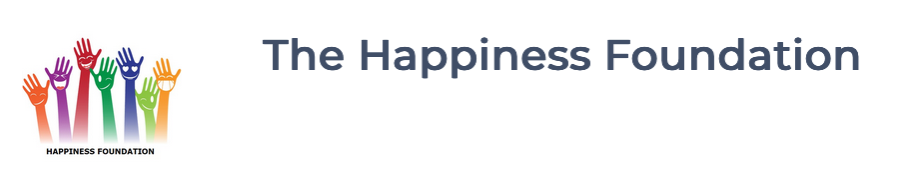

The client for this project is an NGO.

The Happiness Foundation has been around for the last two decades and spans across more than 150 countries.
The NGO comprises professionals and grassroots workers from various walks of life.
The team includes young passionate individuals from different backgrounds who derive contentment by helping the needy, poor, and down-trodden.

### Current Scenario
The foundation has gathered teams from across the world who have been invited for an exhibition of a system that determines the happiness of a particular individual based on certain factors.


### Problems:

The current process suffers from the following problems: 

- With the help of Gallup World Polls, they determine the happiness of individuals across various countries.
- The current process is a resource and time-consuming given that data has to be collected from individuals, processed, analyzed, and then determined what the future results of polls will look like.
- They want to automate the process of predicting the future poll results based on certain given factors.

They want to supplement their analysis and prediction with a more feasible approach.

### Goal:

- You are given datasets of the world happiness report with Life Ladder indicating the happiness score of the individual.
- Your task is to build a regression model using the datasets.
- Because there was no machine learning model for this problem in the foundation, you don’t have a quantifiable win condition. You need to build the best possible model.

### Synopsis

- The current method of determining the Life Ladder score is infeasible due to  resource and time-consumptions
- Life Ladder' is dependent variable in the given dataset
- Gallup World Pollsare being considered for the dataset according to the problem statement
- Regression category of machine learning task is considered for the project


### Importing the Data

In [105]:
# Standard library import-Python program# for some basic operations
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt    # for graphics
import seaborn as sns              # for visualizations
plt.style.use('fivethirtyeight')                

import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Use to configure display of graph
%matplotlib inline 

#stop unnecessary warnings from printing to the screen
import warnings
warnings.simplefilter('ignore')

# for interactive visualizations
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
init_notebook_mode(connected = True)

In [106]:
#Importing Dataset
happiness_train = pd.read_csv("train_data.csv")
happiness_train.head()

,Country name,year,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,ID,Life Ladder
0,Jordan,2008,9.343,0.766,64.22,NaN,-0.127,0.709,0.669,0.331,862,4.930
1,Estonia,2013,10.299,0.901,67.48,0.754,-0.201,0.726,0.702,0.199,534,5.367
2,Sweden,2018,10.881,0.931,72.60,0.942,0.077,0.263,0.823,0.161,1649,7.375
3,Tajikistan,2006,7.554,0.724,60.64,0.702,-0.088,0.768,0.566,0.195,1682,4.613
4,Kuwait,2014,10.945,NaN,65.80,NaN,NaN,NaN,NaN,NaN,925,6.180


### Understanding the Data

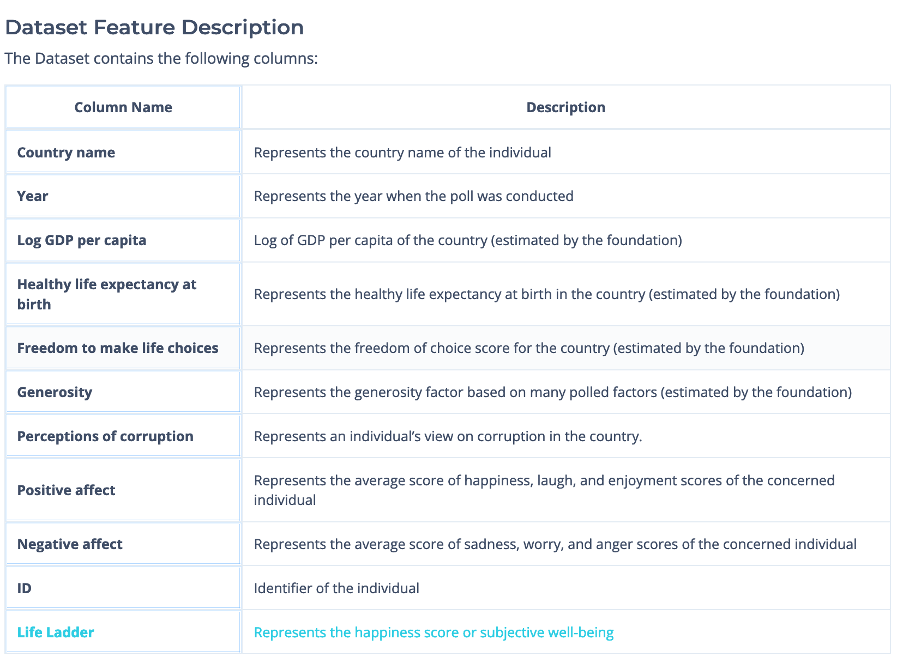

In [107]:
happiness_train.shape

(1559, 12)

In [108]:
happiness_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1559 entries, 0 to 1558
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      1559 non-null   object 
 1   year                              1559 non-null   int64  
 2   Log GDP per capita                1533 non-null   float64
 3   Social support                    1549 non-null   float64
 4   Healthy life expectancy at birth  1522 non-null   float64
 5   Freedom to make life choices      1537 non-null   float64
 6   Generosity                        1488 non-null   float64
 7   Perceptions of corruption         1473 non-null   float64
 8   Positive affect                   1542 non-null   float64
 9   Negative affect                   1545 non-null   float64
 10  ID                                1559 non-null   int64  
 11  Life Ladder                       1559 non-null   float64
dtypes: flo

In [109]:
happiness_train.describe()

,year,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,ID,Life Ladder
count,1559.000000,1533.000000,1549.000000,1522.000000,1537.000000,1488.000000,1473.000000,1542.000000,1545.000000,1559.000000,1559.000000
mean,2013.131495,9.362995,0.812689,63.331680,0.741882,0.000343,0.748248,0.708551,0.267644,974.962797,5.469321
std,4.206026,1.160240,0.118762,7.478307,0.142326,0.163385,0.186708,0.108029,0.084431,562.023107,1.113280
min,2005.000000,6.635000,0.290000,32.300000,0.260000,-0.335000,0.035000,0.322000,0.083000,0.000000,2.375000
25%,2010.000000,8.460000,0.753000,58.340000,0.646000,-0.113000,0.691000,0.623000,0.206000,494.500000,4.649500
50%,2013.000000,9.456000,0.835000,65.180000,0.763000,-0.025000,0.804000,0.721000,0.258000,973.000000,5.374000
75%,2017.000000,10.332000,0.905000,68.535000,0.855000,0.091000,0.873000,0.798000,0.319000,1459.500000,6.272500
max,2020.000000,11.648000,0.987000,77.100000,0.985000,0.698000,0.983000,0.944000,0.705000,1948.000000,8.019000


In [110]:
happiness_train['Country name'].nunique()

165

In [111]:
happiness_train['year'].value_counts()

2012    119
2015    116
2017    115
2014    114
2018    111
2019    111
2011    109
2013    109
2016    108
2009     96
2010     96
2008     89
2007     87
2020     79
2006     77
2005     23
Name: year, dtype: int64

In [112]:
happiness_train['Country name'].value_counts()

Mexico      15
Jordan      15
Greece      14
Belgium     14
Egypt       14
            ..
Guyana       1
Maldives     1
Suriname     1
Cuba         1
Belize       1
Name: Country name, Length: 165, dtype: int64

In [115]:
### Check Correlationcorrelation between features.
happiness_train.corr()

,year,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,ID,Life Ladder
year,1.000000,0.075898,-0.006905,0.163621,0.211746,-0.043776,-0.072938,-0.001709,0.199585,0.000577,0.033604
Log GDP per capita,0.075898,1.000000,0.696893,0.850872,0.359674,-0.006162,-0.341493,0.296017,-0.215581,0.005695,0.786712
Social support,-0.006905,0.696893,1.000000,0.621460,0.420372,0.062367,-0.225764,0.424982,-0.403880,0.134547,0.703878
Healthy life expectancy at birth,0.163621,0.850872,0.621460,1.000000,0.381830,0.019077,-0.322159,0.311821,-0.137307,-0.013300,0.750773
Freedom to make life choices,0.211746,0.359674,0.420372,0.381830,1.000000,0.327079,-0.480826,0.614398,-0.272536,0.048318,0.529819
Generosity,-0.043776,-0.006162,0.062367,0.019077,0.327079,1.000000,-0.276108,0.377166,-0.106673,0.093828,0.194970
Perceptions of corruption,-0.072938,-0.341493,-0.225764,-0.322159,-0.480826,-0.276108,1.000000,-0.300299,0.277781,-0.043447,-0.427562
Positive affect,-0.001709,0.296017,0.424982,0.311821,0.614398,0.377166,-0.300299,1.000000,-0.357850,0.045986,0.534640
Negative affect,0.199585,-0.215581,-0.403880,-0.137307,-0.272536,-0.106673,0.277781,-0.357850,1.000000,-0.143134,-0.301821
ID,0.000577,0.005695,0.134547,-0.013300,0.048318,0.093828,-0.043447,0.045986,-0.143134,1.000000,-0.000884


In [116]:
#Checking if any values in the variables are null 
happiness_train.isnull().sum()

Country name                         0
year                                 0
Log GDP per capita                  26
Social support                      10
Healthy life expectancy at birth    37
Freedom to make life choices        22
Generosity                          71
Perceptions of corruption           86
Positive affect                     17
Negative affect                     14
ID                                   0
Life Ladder                          0
dtype: int64

### Data Visualisation

In [117]:
import matplotlib.pyplot as plt
import seaborn as sb
import warnings  
warnings.filterwarnings('ignore')
import pandas as pd 

Text(0.5, 1.0, 'Correlation between features')

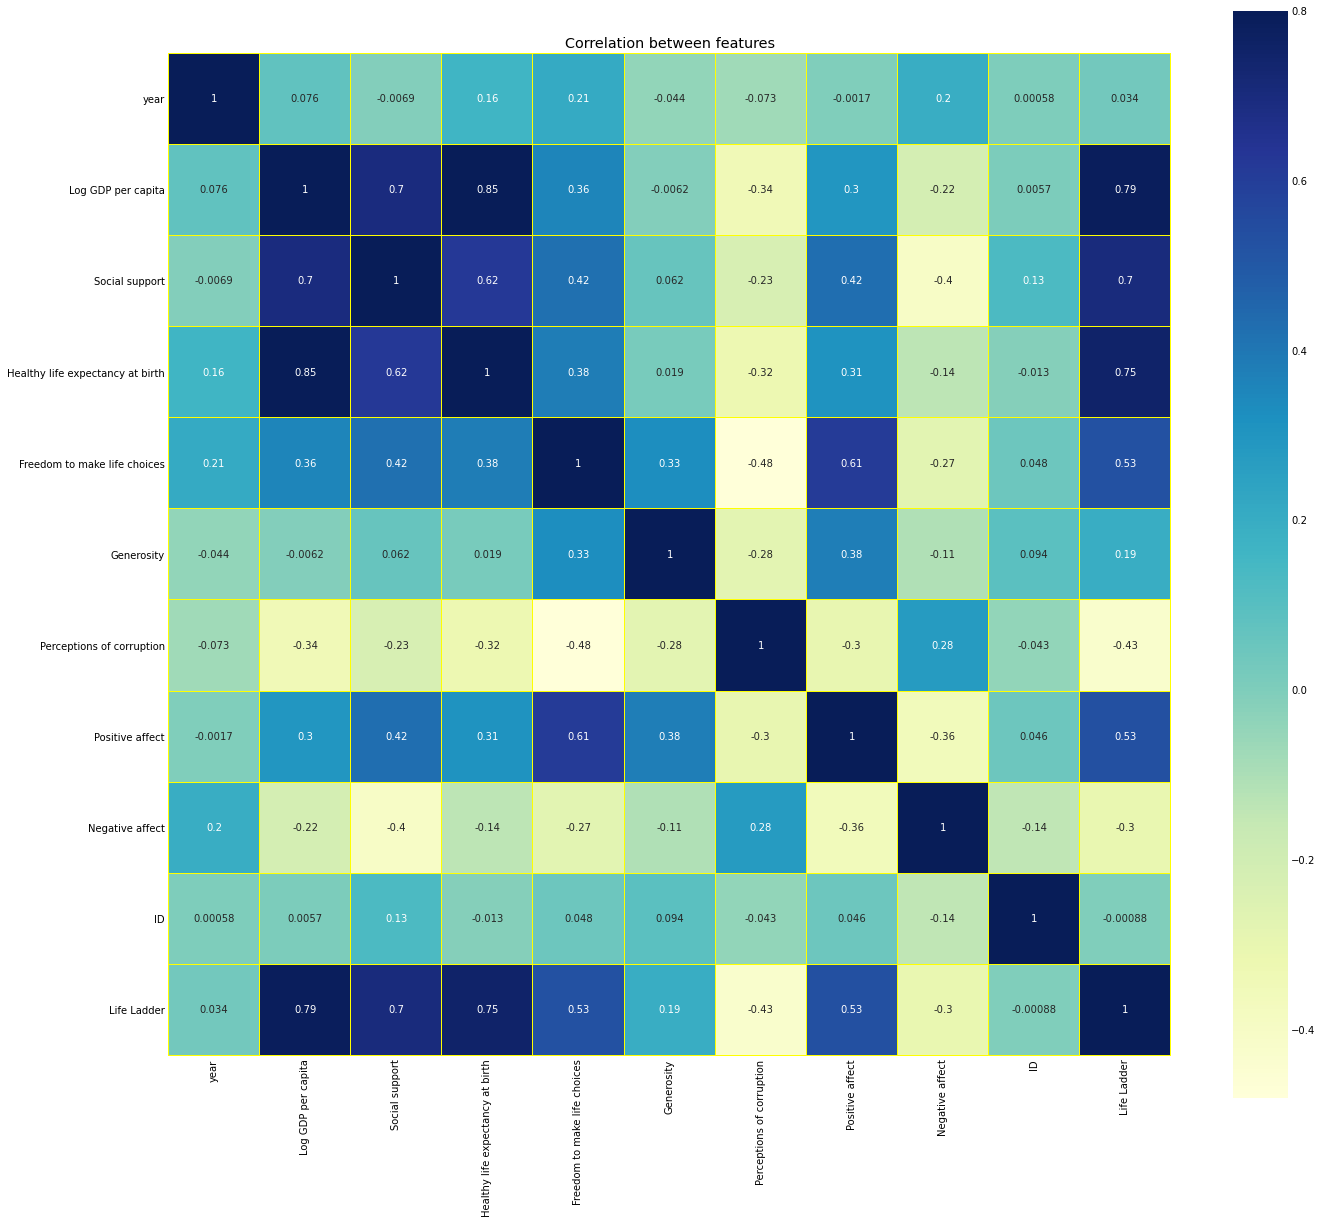

In [118]:
# Correlation
corr = happiness_train.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr,vmax=.8,linewidth=.01, square = True, annot = True,cmap='YlGnBu',linecolor ='yellow')
plt.title('Correlation between features')

array([[<AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'Log GDP per capita'}>,
        <AxesSubplot:title={'center':'Social support'}>],
       [<AxesSubplot:title={'center':'Healthy life expectancy at birth'}>,
        <AxesSubplot:title={'center':'Freedom to make life choices'}>,
        <AxesSubplot:title={'center':'Generosity'}>],
       [<AxesSubplot:title={'center':'Perceptions of corruption'}>,
        <AxesSubplot:title={'center':'Positive affect'}>,
        <AxesSubplot:title={'center':'Negative affect'}>],
       [<AxesSubplot:title={'center':'ID'}>,
        <AxesSubplot:title={'center':'Life Ladder'}>, <AxesSubplot:>]],
      dtype=object)

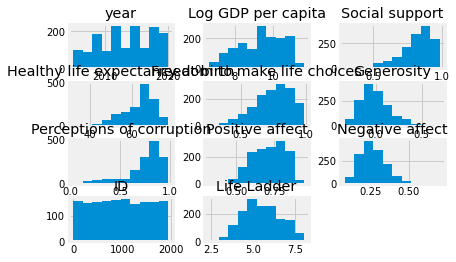

In [122]:
happiness_train.hist()

<AxesSubplot:xlabel='Life Ladder', ylabel='Density'>

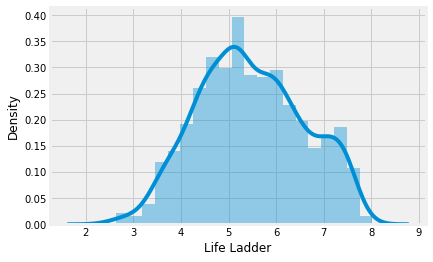

In [123]:
sns.distplot(happiness_train['Life Ladder'])

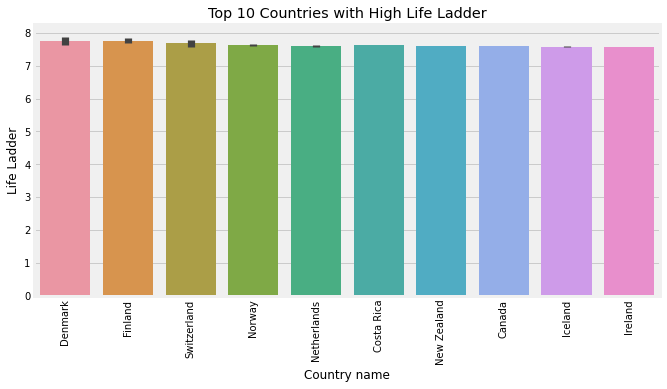

In [124]:
plt.figure(figsize=(10,5))
plt.title("Top 10 Countries with High Life Ladder")
sb.barplot(data = happiness_train.sort_values('Life Ladder', ascending= False).head(28), x='Country name', y='Life Ladder')
plt.xticks(rotation=90);

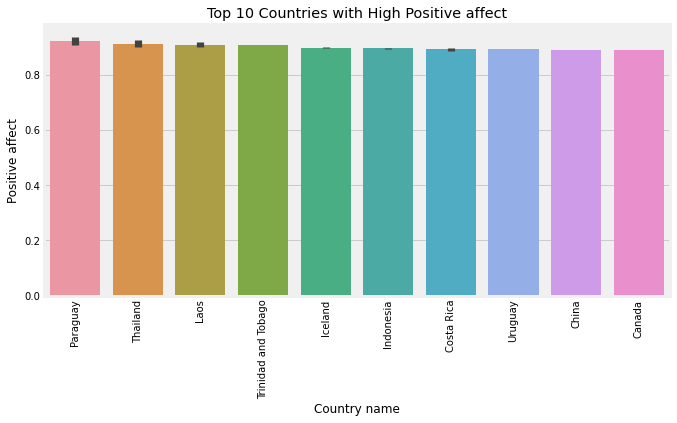

In [125]:
plt.figure(figsize=(10,5))
plt.title("Top 10 Countries with High Positive affect")
sb.barplot(data = happiness_train.sort_values('Positive affect', ascending= False).head(20), x='Country name', y='Positive affect')
plt.xticks(rotation=90);

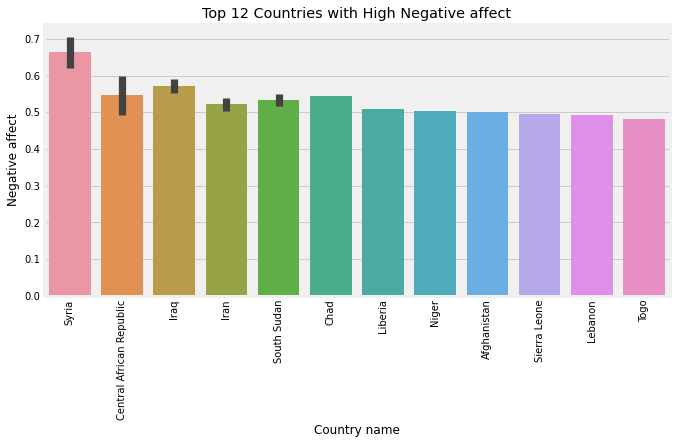

In [126]:
plt.figure(figsize=(10,5))
plt.title("Top 12 Countries with High Negative affect")
sb.barplot(data = happiness_train.sort_values('Negative affect', ascending= False).head(21), x='Country name', y='Negative affect')
plt.xticks(rotation=90);

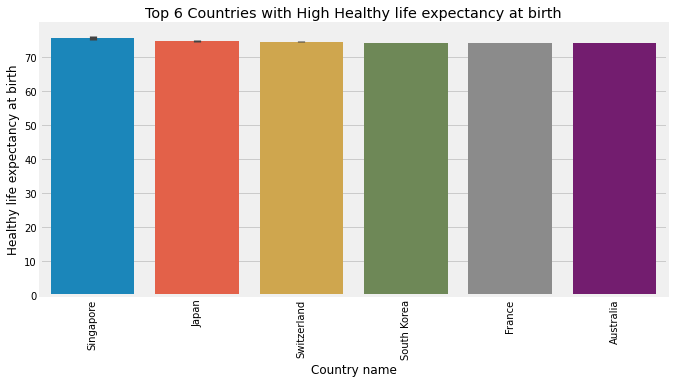

In [127]:
plt.figure(figsize=(10,5))
plt.title("Top 6 Countries with High Healthy life expectancy at birth")
sb.barplot(data = happiness_train.sort_values('Healthy life expectancy at birth', ascending= False).head(22), x='Country name', y='Healthy life expectancy at birth')
plt.xticks(rotation=90);

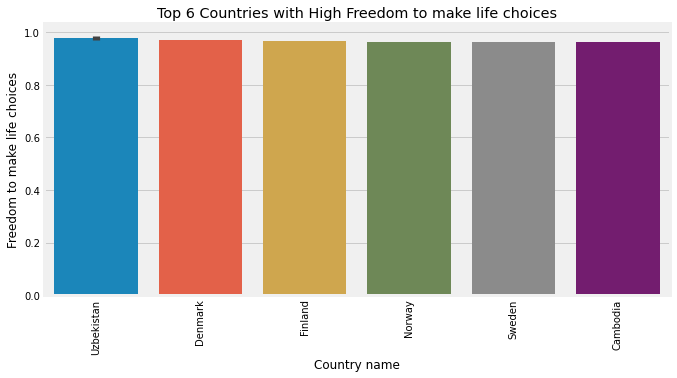

In [128]:
plt.figure(figsize=(10,5))
plt.title("Top 6 Countries with High Freedom to make life choices")
sb.barplot(data = happiness_train.sort_values('Freedom to make life choices', ascending= False).head(10), x='Country name', y='Freedom to make life choices')
plt.xticks(rotation=90);

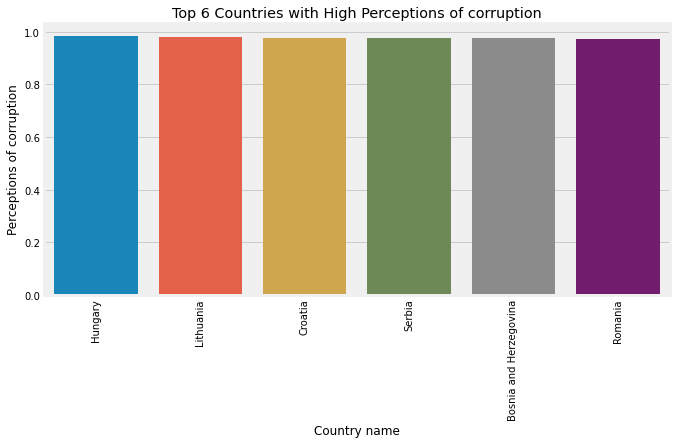

In [129]:
plt.figure(figsize=(10,5))
plt.title("Top 6 Countries with High Perceptions of corruption")
sb.barplot(data = happiness_train.sort_values('Perceptions of corruption', ascending= False).head(6), x='Country name', y='Perceptions of corruption')
plt.xticks(rotation=90);

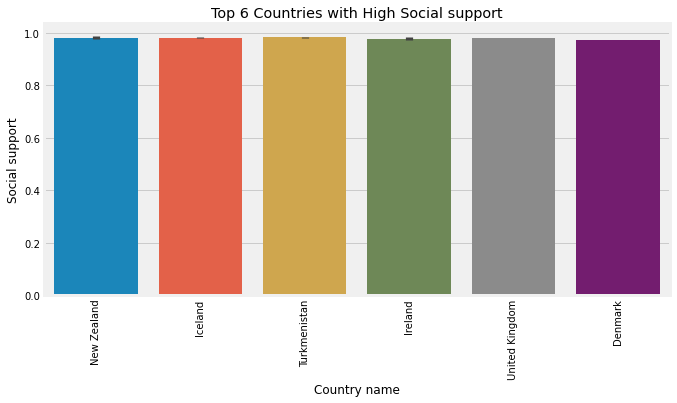

In [130]:
plt.figure(figsize=(10,5))
plt.title("Top 6 Countries with High Social support")
sb.barplot(data = happiness_train.sort_values('Social support', ascending= False).head(15), x='Country name', y='Social support')
plt.xticks(rotation=90);

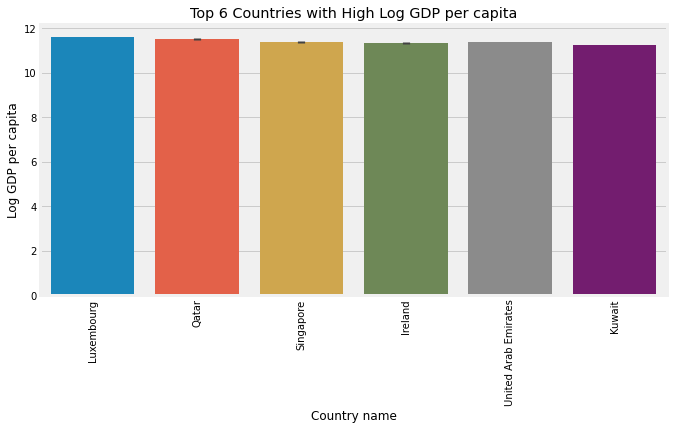

In [131]:
plt.figure(figsize=(10,5))
plt.title("Top 6 Countries with High Log GDP per capita")
sb.barplot(data = happiness_train.sort_values('Log GDP per capita', ascending= False).head(30), x='Country name', y='Log GDP per capita')
plt.xticks(rotation=90);

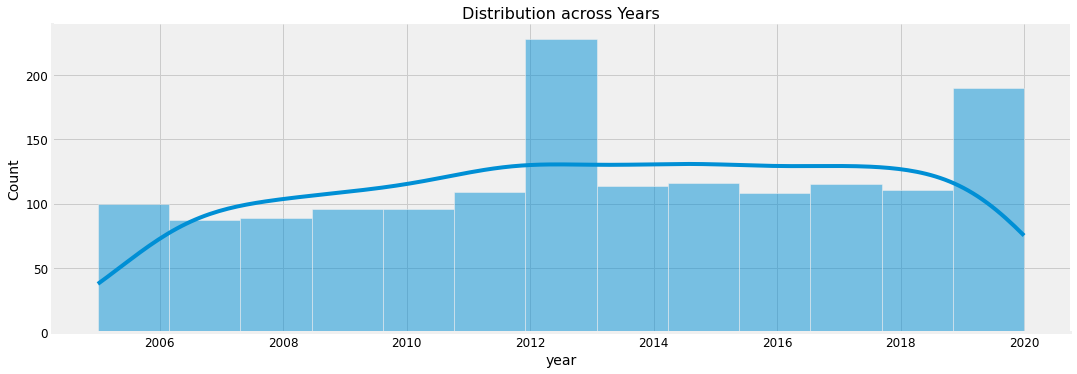

In [132]:
# Create a countplot for Type feature
sns.displot(x='year', data=happiness_train, kde=True, height=5, aspect=3)

# Adding some cosmetics
plt.yticks(size=12)
plt.xticks(size=12)
plt.xlabel(xlabel="year", size=14)
plt.ylabel(ylabel='Count', size=14)
plt.title(label="Distribution across Years", size=16)
plt.grid(b=True)

# Display the output
plt.show()

<AxesSubplot:xlabel='Life Ladder', ylabel='Log GDP per capita'>

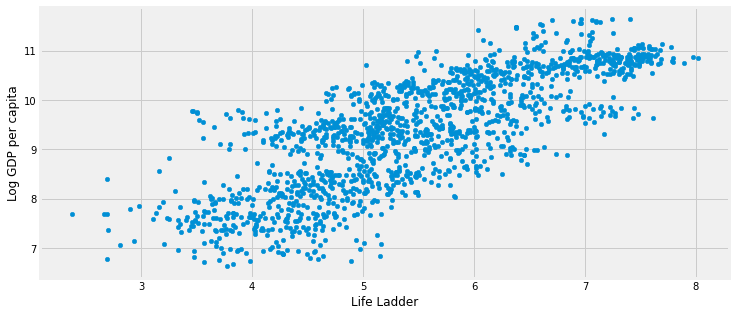

In [133]:

happiness_train.plot.scatter(x='Life Ladder',y='Log GDP per capita',colormap='viridis', figsize=(11, 5))
                      

<AxesSubplot:xlabel='Life Ladder', ylabel='Negative affect'>

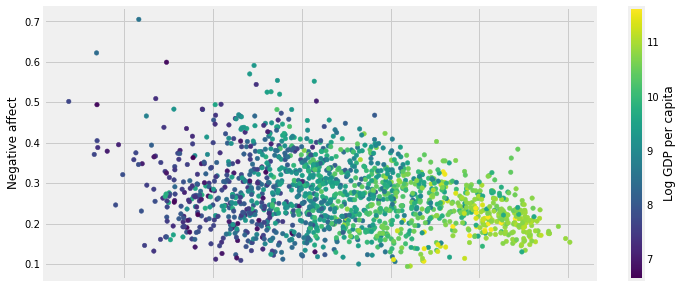

In [25]:

happiness_train.plot.scatter(x='Life Ladder',y='Negative affect',c='Log GDP per capita',colormap='viridis', figsize=(11, 5))
                      

<AxesSubplot:xlabel='Life Ladder', ylabel='Positive affect'>

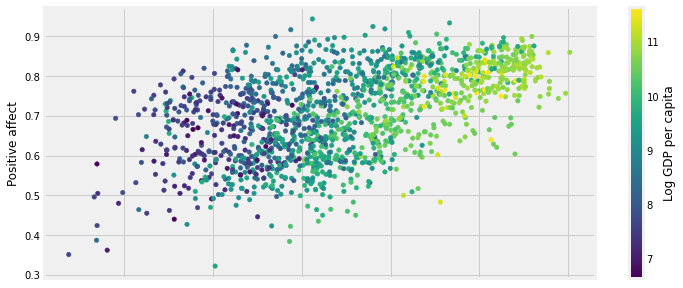

In [226]:

happiness_train.plot.scatter(x='Life Ladder',y='Positive affect',c='Log GDP per capita',colormap='viridis', figsize=(11, 5))
                      

<AxesSubplot:xlabel='Life Ladder', ylabel='Perceptions of corruption'>

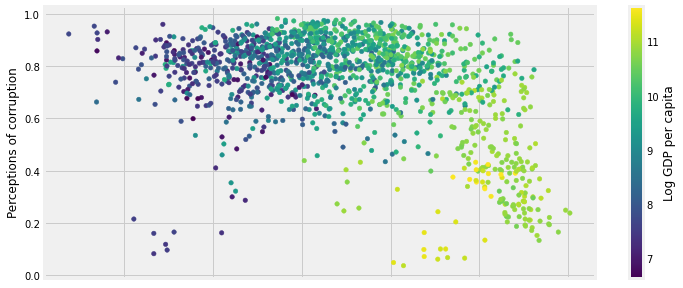

In [134]:
happiness_train.plot.scatter(x='Life Ladder',y='Perceptions of corruption',c='Log GDP per capita',colormap='viridis', figsize=(11, 5))
                      

<AxesSubplot:xlabel='Life Ladder', ylabel='Social support'>

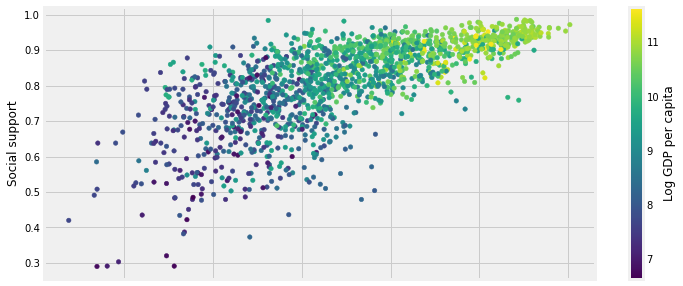

In [135]:
happiness_train.plot.scatter(x='Life Ladder',y='Social support',c='Log GDP per capita',colormap='viridis', figsize=(11, 5))
                      

<AxesSubplot:xlabel='Life Ladder', ylabel='Healthy life expectancy at birth'>

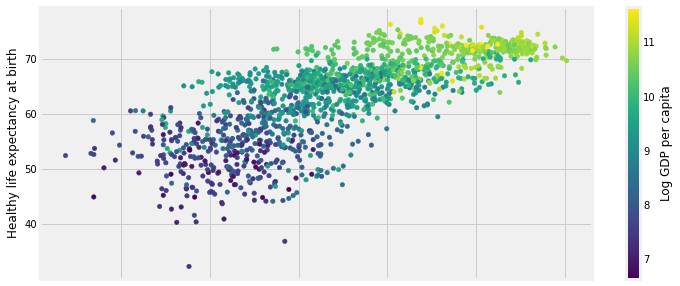

In [136]:
happiness_train.plot.scatter(x='Life Ladder',y='Healthy life expectancy at birth',c='Log GDP per capita',colormap='viridis', figsize=(11, 5))
                      

<AxesSubplot:xlabel='Life Ladder', ylabel='Freedom to make life choices'>

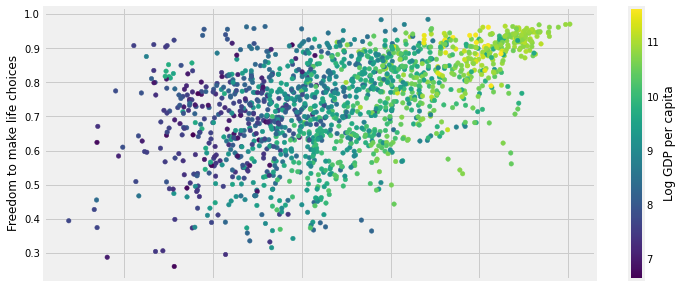

In [137]:
happiness_train.plot.scatter(x='Life Ladder',y='Freedom to make life choices',c='Log GDP per capita',colormap='viridis', figsize=(11, 5))                     

<AxesSubplot:xlabel='Life Ladder', ylabel='Generosity'>

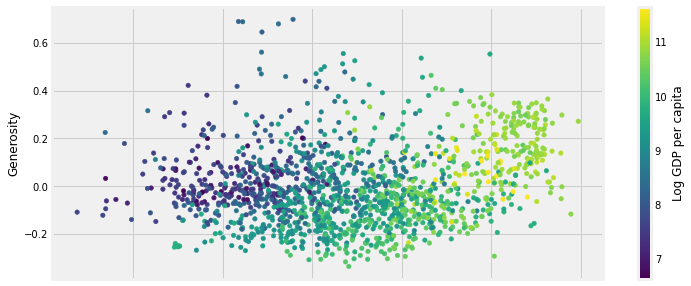

In [138]:
happiness_train.plot.scatter(x='Life Ladder',y='Generosity',c='Log GDP per capita',colormap='viridis', figsize=(11, 5))                     

<AxesSubplot:xlabel='Life Ladder', ylabel='Generosity'>

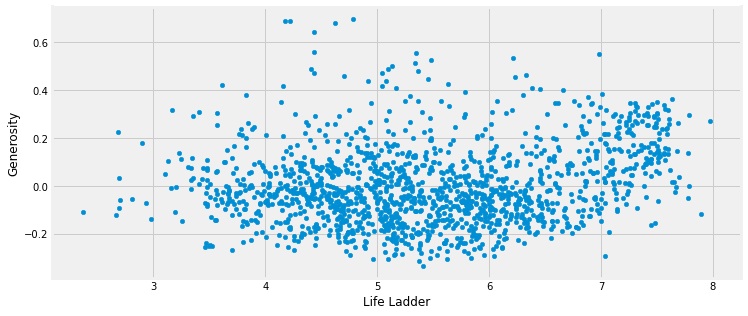

In [139]:
happiness_train.plot.scatter(x='Life Ladder',y='Generosity',colormap='viridis', figsize=(11, 5))                     

<AxesSubplot:xlabel='Life Ladder', ylabel='Generosity'>

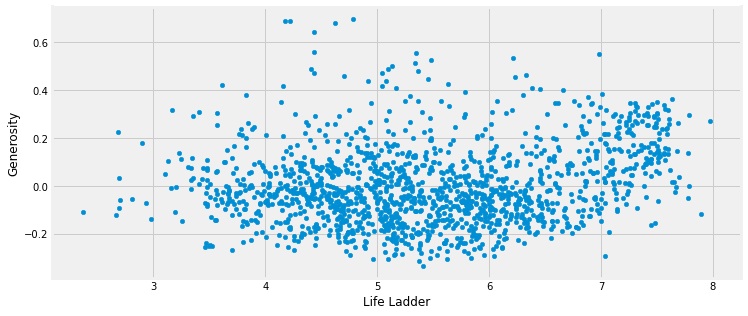

In [140]:
happiness_train.plot.scatter(x='Life Ladder',y='Generosity',colormap='viridis', figsize=(11, 5))                     

### Key Observations

- Life Ladder has high positive correlation with Log GDP per capita feature before any data pre-processing
- 283 missing cells are present in the training dataset
- The mean value of the Generosity feature before any data pre-processing is 0.000343
- 1.11 is the standard deviation of the Life Ladder feature before pre-processing
- 2005-2020 is the range of the year feature in the train set
- 165 countries are present in the training dataset
- Data distribution is high between 2012 to 2020
- There are no categorical values

### Feature Engineering

In [141]:
#Checking if any values in the variables are null 
happiness_train.isnull().sum()

Country name                         0
year                                 0
Log GDP per capita                  26
Social support                      10
Healthy life expectancy at birth    37
Freedom to make life choices        22
Generosity                          71
Perceptions of corruption           86
Positive affect                     17
Negative affect                     14
ID                                   0
Life Ladder                          0
dtype: int64

In [142]:
##replace missing values
happiness_train['Log GDP per capita'].fillna(value=happiness_train['Log GDP per capita'].mean(), inplace=True)
happiness_train['Social support'].fillna(value=happiness_train['Social support'].mean(), inplace=True)
happiness_train['Healthy life expectancy at birth'].fillna(value=happiness_train['Healthy life expectancy at birth'].mean(), inplace=True)
happiness_train['Freedom to make life choices'].fillna(value=happiness_train['Freedom to make life choices'].mean(), inplace=True)
happiness_train['Generosity'].fillna(value=happiness_train['Generosity'].mean(), inplace=True)
happiness_train['Perceptions of corruption'].fillna(value=happiness_train['Perceptions of corruption'].mean(), inplace=True)
happiness_train['Positive affect'].fillna(value=happiness_train['Positive affect'].mean(), inplace=True)
happiness_train['Negative affect'].fillna(value=happiness_train['Negative affect'].mean(), inplace=True)

In [143]:
#Checking if any values in the variables are null 
happiness_train.isnull().sum()

Country name                        0
year                                0
Log GDP per capita                  0
Social support                      0
Healthy life expectancy at birth    0
Freedom to make life choices        0
Generosity                          0
Perceptions of corruption           0
Positive affect                     0
Negative affect                     0
ID                                  0
Life Ladder                         0
dtype: int64

In [144]:
happiness_train.head()

,Country name,year,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,ID,Life Ladder
0,Jordan,2008,9.343,0.766000,64.22,0.741882,-0.127000,0.709000,0.669000,0.331000,862,4.930
1,Estonia,2013,10.299,0.901000,67.48,0.754000,-0.201000,0.726000,0.702000,0.199000,534,5.367
2,Sweden,2018,10.881,0.931000,72.60,0.942000,0.077000,0.263000,0.823000,0.161000,1649,7.375
3,Tajikistan,2006,7.554,0.724000,60.64,0.702000,-0.088000,0.768000,0.566000,0.195000,1682,4.613
4,Kuwait,2014,10.945,0.812689,65.80,0.741882,0.000343,0.748248,0.708551,0.267644,925,6.180


In [145]:
##Drop ID
happiness_train.drop(columns ='ID', inplace=True)
happiness_train.drop(columns ='Country name', inplace=True)

In [35]:
x=pd.DataFrame(happiness_train.iloc[:,2 :]) 
x.head(3)

,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Life Ladder
0,0.766,64.22,0.741882,-0.127,0.709,0.669,0.331,4.930
1,0.901,67.48,0.754000,-0.201,0.726,0.702,0.199,5.367
2,0.931,72.60,0.942000,0.077,0.263,0.823,0.161,7.375


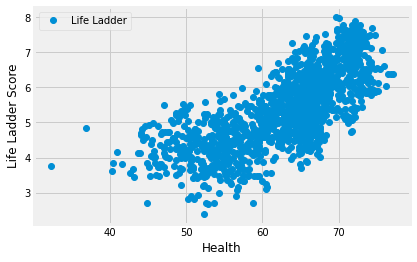

In [146]:
#Visualize the variables Healthy life expectancy at birth Vs Life Ladder
import matplotlib.pyplot as plt    
happiness_train.plot(x ='Healthy life expectancy at birth', y ='Life Ladder', style ='o' )
plt.xlabel('Health')
plt.ylabel('Life Ladder Score')
plt.show()

In [147]:
#Divide the data into train and test sets:
 
happiness_train.columns


Index(['year', 'Log GDP per capita', 'Social support',
       'Healthy life expectancy at birth', 'Freedom to make life choices',
       'Generosity', 'Perceptions of corruption', 'Positive affect',
       'Negative affect', 'Life Ladder'],
      dtype='object')

In [148]:
#Extract the independent column label to prepare X
X = pd.DataFrame()
def tree():
    X = happiness_train.drop('Life Ladder',axis=1)
    return X
X = tree()

In [149]:
#Extract dependent column "label" into a dataframe y for model prediction
y = pd.DataFrame()
def tree():
    y = happiness_train.loc[:,happiness_train.columns == 'Life Ladder']
    return y
y = tree()

In [150]:
X.head()

,year,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,2008,9.343,0.766000,64.22,0.741882,-0.127000,0.709000,0.669000,0.331000
1,2013,10.299,0.901000,67.48,0.754000,-0.201000,0.726000,0.702000,0.199000
2,2018,10.881,0.931000,72.60,0.942000,0.077000,0.263000,0.823000,0.161000
3,2006,7.554,0.724000,60.64,0.702000,-0.088000,0.768000,0.566000,0.195000
4,2014,10.945,0.812689,65.80,0.741882,0.000343,0.748248,0.708551,0.267644


In [151]:
y.head()

,Life Ladder
0,4.930
1,5.367
2,7.375
3,4.613
4,6.180


In [152]:
#We'll proceed with TrainTestSplit without removing any column.
X = happiness_train.loc[:,happiness_train.columns != 'Life Ladder']
y = happiness_train.loc[:,happiness_train.columns == 'Life Ladder']

In [153]:
#Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, random_state=1)

In [154]:
#Have a glance at the shape of the train and test sets:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1247, 9)
(312, 9)
(1247, 1)
(312, 1)


In [155]:
from sklearn.linear_model import LinearRegression

# Regression model
regressor = LinearRegression()


In [156]:
# Fitting the data to my model
#model = regression.fit(x_train, y_train)
regressor.fit(X_train, y_train)  

LinearRegression()

In [157]:
# Having a look at the coefficients that the model has chosen:
import pandas as pd

v = pd.DataFrame(regressor.coef_,index=['Co-efficient']).transpose()
w = pd.DataFrame(x.columns, columns=['attribute'])


In [159]:
coeff_d2020 = pd.concat([w,v], axis=1, join='inner')
coeff_d2020


,attribute,Co-efficient
0,Social support,-0.012759
1,Healthy life expectancy at birth,0.343135
2,Freedom to make life choices,1.660393
3,Generosity,0.033774
4,Perceptions of corruption,0.579808
5,Positive affect,0.318838
6,Negative affect,-0.584849
7,Life Ladder,2.041611


In [160]:
import numpy as np
y_pred = regressor.predict(X_test)
y_pred = pd.DataFrame(y_pred, columns=['Predictions'])
y_pred.head(3)

,Predictions
0,5.445480
1,4.407608
2,4.985972


In [161]:
from sklearn import metrics
import numpy as np

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.43420328898540345
Mean Squared Error: 0.30066739023163686
Root Mean Squared Error: 0.5483314601877562


In [162]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred)
print('r2 score for a model which predicts mean value always is', r2)

r2 score for a model which predicts mean value always is 0.7696608759919162


In [163]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

np.random.seed(9876789)


In [183]:
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:            Life Ladder   R-squared (uncentered):                   0.990
Model:                            OLS   Adj. R-squared (uncentered):              0.990
Method:                 Least Squares   F-statistic:                          1.792e+04
Date:                Tue, 12 Oct 2021   Prob (F-statistic):                        0.00
Time:                        22:45:36   Log-Likelihood:                         -1264.5
No. Observations:                1559   AIC:                                      2547.
Df Residuals:                    1550   BIC:                                      2595.
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                                       coef    std err          t      P>|t|      [0.025      0.975]
-------------------

### Importing Test DataSet  and using the Logistic Regression Model for prediction

In [165]:
#Importing TestDataset
happiness_test = pd.read_csv("test_data.csv")
happiness_test.head()

,Country name,year,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,ID
0,Spain,2020,10.488,0.935,75.00,0.783,-0.121,0.730,0.686,0.317,1614
1,Poland,2017,10.314,0.882,68.90,0.831,-0.122,0.639,0.677,0.203,1405
2,Lebanon,2012,9.800,0.713,65.36,0.621,-0.006,0.856,0.499,0.339,974
3,Malaysia,2011,9.966,0.770,65.76,0.840,-0.016,0.842,0.887,0.155,1055
4,Canada,2020,10.730,0.931,74.00,0.887,0.050,0.434,0.796,0.307,307


In [166]:
#Checking if any values in the variables are null 
happiness_test.isnull().sum()

Country name                         0
year                                 0
Log GDP per capita                  10
Social support                       3
Healthy life expectancy at birth    18
Freedom to make life choices        10
Generosity                          18
Perceptions of corruption           24
Positive affect                      5
Negative affect                      2
ID                                   0
dtype: int64

In [167]:
##replace missing values
happiness_test['Log GDP per capita'].fillna(value=happiness_test['Log GDP per capita'].mean(), inplace=True)
happiness_test['Social support'].fillna(value=happiness_test['Social support'].mean(), inplace=True)
happiness_test['Healthy life expectancy at birth'].fillna(value=happiness_test['Healthy life expectancy at birth'].mean(), inplace=True)
happiness_test['Freedom to make life choices'].fillna(value=happiness_test['Freedom to make life choices'].mean(), inplace=True)
happiness_test['Generosity'].fillna(value=happiness_test['Generosity'].mean(), inplace=True)
happiness_test['Perceptions of corruption'].fillna(value=happiness_test['Perceptions of corruption'].mean(), inplace=True)
happiness_test['Positive affect'].fillna(value=happiness_test['Positive affect'].mean(), inplace=True)
happiness_test['Negative affect'].fillna(value=happiness_test['Negative affect'].mean(), inplace=True)


In [168]:
#Checking if any values in the variables are null 
happiness_test.isnull().sum()

Country name                        0
year                                0
Log GDP per capita                  0
Social support                      0
Healthy life expectancy at birth    0
Freedom to make life choices        0
Generosity                          0
Perceptions of corruption           0
Positive affect                     0
Negative affect                     0
ID                                  0
dtype: int64

In [169]:
#customerID is unique value column and add no sense to data. Hence keeping it in seprate dataframe for output csv and removing from main dataframe
custId = happiness_test.ID
happiness_test.drop(columns ='ID', inplace=True)

In [170]:
happiness_test.head()

,Country name,year,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Spain,2020,10.488,0.935,75.00,0.783,-0.121,0.730,0.686,0.317
1,Poland,2017,10.314,0.882,68.90,0.831,-0.122,0.639,0.677,0.203
2,Lebanon,2012,9.800,0.713,65.36,0.621,-0.006,0.856,0.499,0.339
3,Malaysia,2011,9.966,0.770,65.76,0.840,-0.016,0.842,0.887,0.155
4,Canada,2020,10.730,0.931,74.00,0.887,0.050,0.434,0.796,0.307


In [171]:
happiness_test.drop(columns ='Country name', inplace=True)

In [172]:
happiness_test.head()

,year,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,2020,10.488,0.935,75.00,0.783,-0.121,0.730,0.686,0.317
1,2017,10.314,0.882,68.90,0.831,-0.122,0.639,0.677,0.203
2,2012,9.800,0.713,65.36,0.621,-0.006,0.856,0.499,0.339
3,2011,9.966,0.770,65.76,0.840,-0.016,0.842,0.887,0.155
4,2020,10.730,0.931,74.00,0.887,0.050,0.434,0.796,0.307


In [173]:
#We have X features only and we need to predict Y
X_test = happiness_test
import numpy as np
y_pred = regressor.predict(X_test)
y_pred = pd.DataFrame(y_pred, columns=['Predictions'])
y_pred.head(3)

,Predictions
0,6.326607
1,6.059280
2,4.988433


In [174]:
testDataFrame= pd.DataFrame(data=y_pred)

In [175]:
testDataFrame.insert(0,'',custId)

In [176]:
testDataFrame.head()

,,Predictions
0,1614,6.326607
1,1405,6.059280
2,974,4.988433
3,1055,6.067446
4,307,6.880495


In [177]:
testDataFrame.to_csv('ML_Project3_submission.csv', index =False, header = False)